## IMPORTS

In [1]:
import pandas as pd
import sys
from matplotlib import pyplot as plt
import pickle


sys.path.append('../../')
from utils import clustering_utils, bokeh_ui_utils_final, file_utils, expr_data_utils, print_utils

In [2]:
palette65 = """
white\ngainsboro\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

In [3]:
phases = 'rna_seq'
metric = 'manhattan'
# metric='minkowski_3.0'

resolution_param=0.005
# resolution_param=0.006
# resolution_param=0.007
# resolution_param=0.010
# resolution_param=0.050
# resolution_param=0.1

n_neighbors = 3

dataset = 'rna_seq'

add_scalar=1

In [4]:
full_filtered_df = pd.read_csv('../../active_files/rna_seq.csv')

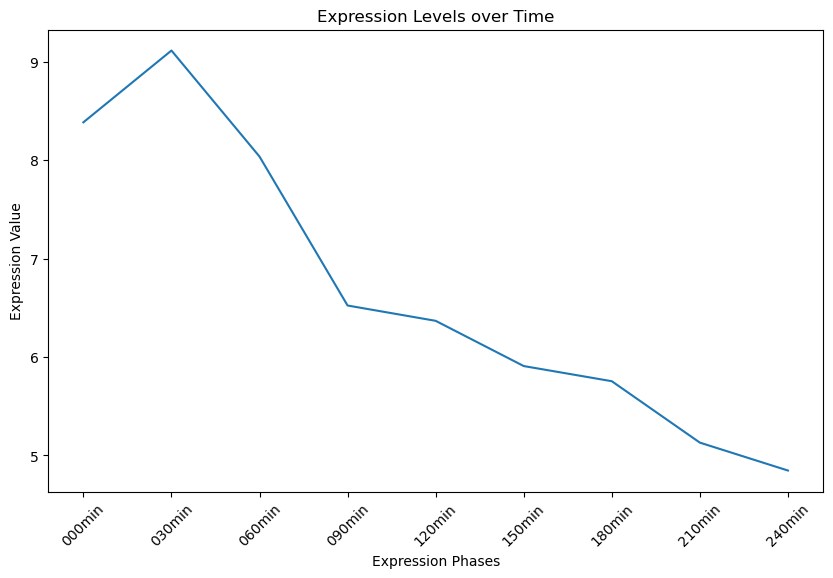

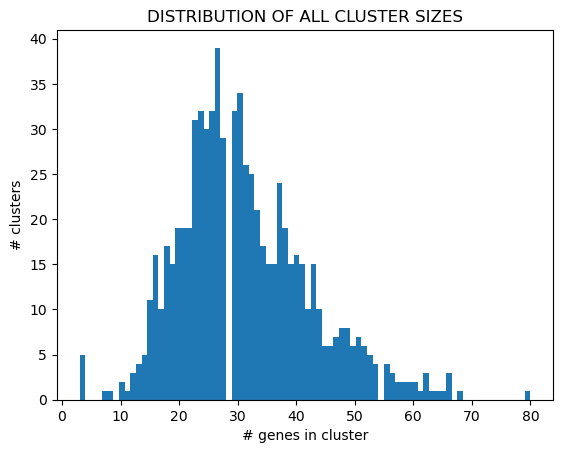

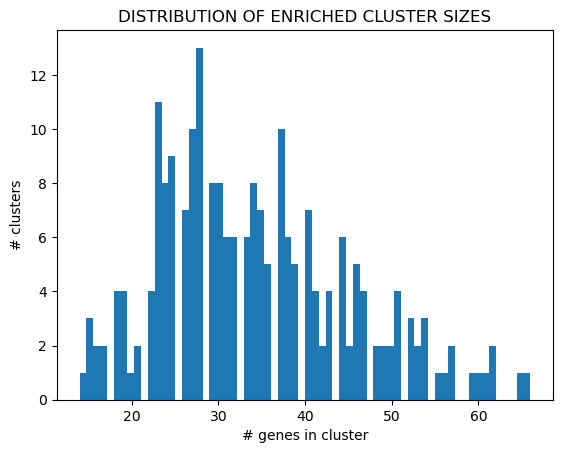

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.005
            silhouette_score: -0.04373752950804873
                  modularity: 0.7941725498040109
                   nclusters: 740
           mean_cluster_size: 31.233783783783785
         median_cluster_size: 29.0
             sd_cluster_size: 11.229218367386029
             q1_cluster_size: 24.0
             q3_cluster_size: 38.0
            max_cluster_size: 80
            min_cluster_size: 3
                      ngenes: 23113
          nenriched_clusters: 219
  mean_enriched_cluster_size: 34.25114155251141
median_enriched_cluster_size: 33.0
    sd_enriched_cluster_size: 11.073269310253671
    q1_enriched_cluster_size: 26.0
    q3_enriched_cluster_size: 41.0
   max_enriched_cluster_size: 66
   min_enriched

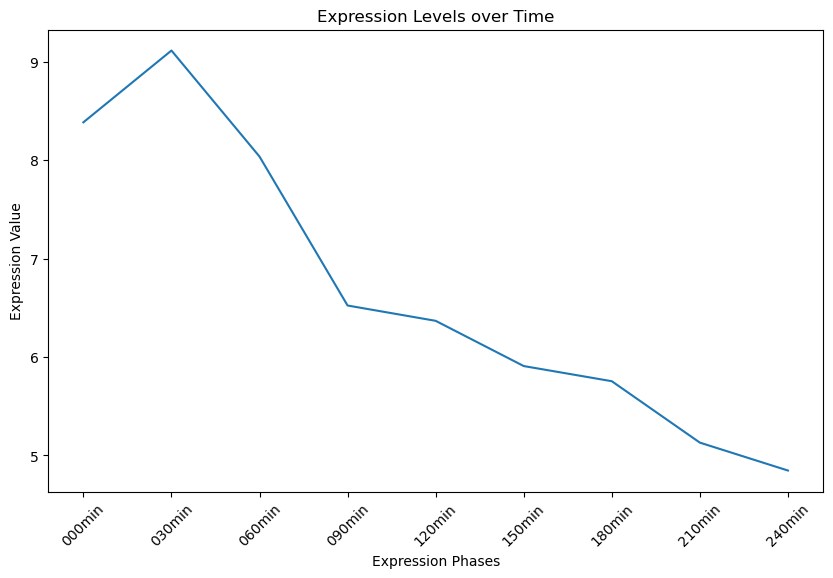

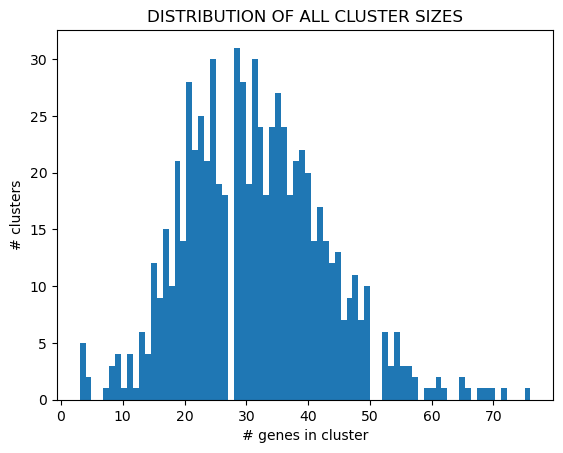

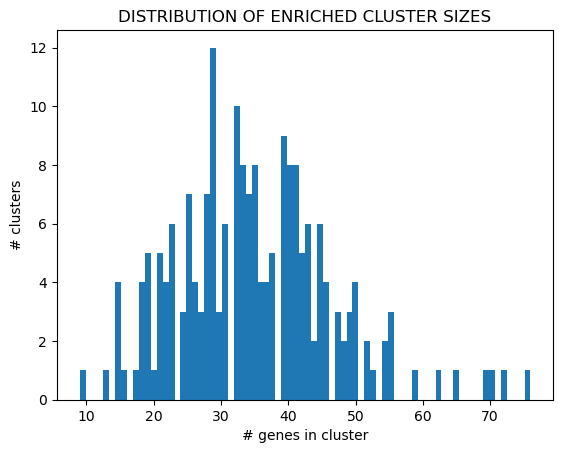

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.005
            silhouette_score: -0.043396643624897285
                  modularity: 0.7901582867218414
                   nclusters: 731
           mean_cluster_size: 31.61833105335157
         median_cluster_size: 31.0
             sd_cluster_size: 11.44979610592031
             q1_cluster_size: 23.0
             q3_cluster_size: 39.0
            max_cluster_size: 76
            min_cluster_size: 3
                      ngenes: 23113
          nenriched_clusters: 199
  mean_enriched_cluster_size: 35.0
median_enriched_cluster_size: 34.0
    sd_enriched_cluster_size: 11.554981087812239
    q1_enriched_cluster_size: 27.5
    q3_enriched_cluster_size: 41.5
   max_enriched_cluster_size: 76
   min_enriched_cluster_size:

In [5]:
data_dict = {
                'expression_dfs':   [
                                    expr_data_utils.mean_df_of_duplicates(
                                        expr_data_utils.normalize_expression_per_gene(full_filtered_df, 'z_score', add_scalar=add_scalar), mean_type='arithmetic'), 
                                    expr_data_utils.mean_df_of_duplicates(
                                        expr_data_utils.normalize_expression_per_gene(full_filtered_df, 'min_max', add_scalar=add_scalar), mean_type='arithmetic')
                                    ],
                'tab_labels': ['Z-score normalization', 'Min-max normalization'],
                'expr_mins': [-3, 0],
                'expr_maxs': [3, 1],
                'label_dfs': [],
                'enrich_dfs': [],
                'avg_dfs': [],
                'color_palettes': []
            }

for it_idx, full_filtered_norm_df in enumerate(data_dict['expression_dfs']):

    num_genes = full_filtered_df.shape[0]

    df = expr_data_utils.mean_df_of_duplicates(full_filtered_df.loc[full_filtered_df['TTHERM_ID'] == 'TTHERM_00092820'], mean_type='arithmetic')

    phase_list = list(df.columns)[1:]
    expression_values = [df[col].values[0] for col in list(df.columns)[1:]]

    plt.figure(figsize=(10, 6))  

    plt.plot(phase_list, expression_values, linestyle='-')

    plt.xlabel("Expression Phases")
    plt.ylabel("Expression Value")
    plt.title("Expression Levels over Time")

    plt.xticks(rotation=45)

    plt.show()

    full_filtered_norm_df.head()
    leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
        full_filtered_norm_df, 
        dataset,
        metric=metric, 
        n_neighbors=n_neighbors, 
        resolution_param=resolution_param, 
        partition_type = 'EXP', 
        n_jobs = -1, 
        random_state=42
        )
    
    with open(f'./{data_dict["tab_labels"][it_idx].lower().replace("-", "_").replace(" ", "_")}_{dataset}.pkl', 'wb') as f:
        pickle.dump(partition_stats, f)
    
    leiden_label_df_round_1_arranged = bokeh_ui_utils_final.arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, phases) 
    leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)

    if data_dict['tab_labels'][it_idx] == 'Min-max normalization':
        leiden_label_df_round_1_arranged_sorted.to_csv('./rna_seq_label_df_round_1.csv', index=False)

    if data_dict['tab_labels'][it_idx] == 'Z-score normalization':
        leiden_label_df_round_1_arranged_sorted.to_csv('./rnaz_seq_label_df_round_1.csv', index=False)

    avg_full_filtered_norm_df = clustering_utils.ari_mean_nexpr_per_mod(full_filtered_norm_df, leiden_label_df_round_1_arranged_sorted)
    plt.hist(cluster_sizes, max(cluster_sizes))
    plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
    plt.xlabel('# genes in cluster')
    plt.ylabel('# clusters')
    plt.show()
    plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
    plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
    plt.xlabel('# genes in cluster')
    plt.ylabel('# clusters')
    plt.show()

    print_utils.print_aligned_dict(partition_stats)
    
    enrich_full_nn3 = clustering_utils.compute_enrichment(leiden_label_df_round_1_arranged_sorted)
    if data_dict['tab_labels'][it_idx] == 'Min-max normalization':
        outfile='../enrichment/rna_seq_full_enrichment.csv'
        enrich_full_nn3.to_csv(outfile, index=False)
        
    complete_annot = pd.read_csv('../../active_files/complete_annotation.csv')
    data_dict['label_dfs'].append(leiden_label_df_round_1_arranged_sorted)
    data_dict['enrich_dfs'].append(enrich_full_nn3)
    data_dict['avg_dfs'].append(avg_full_filtered_norm_df)

In [6]:
with open(('colors_2000_1'), 'rb') as file:
    color_palette_raw = pickle.load(file)

for _df in data_dict['label_dfs']:
    color_palette = palette65

    if len(color_palette_raw) >= max(_df['label'].unique()) + 1:
        color_palette = color_palette_raw[: max(_df['label'].unique()) + 1]

    data_dict['color_palettes'].append(color_palette)

yf_to_ttherm_map_df = None

embedding_metric = 'manhattan'

dashboard_path = file_utils.generate_uniquely_numbered_export_path('./plots/', 'dashboard', '.html', tags=[dataset, 'umap', metric, f'{n_neighbors}nn', f'{resolution_param}rp'])

p = bokeh_ui_utils_final.generate_and_save_umap_tabbed(
                                                dashboard_path, 
                                                data_dict['expression_dfs'], 
                                                data_dict['tab_labels'],
                                                data_dict['enrich_dfs'], 
                                                complete_annot, 
                                                data_dict['label_dfs'], 
                                                phases, 
                                                data_dict['color_palettes'], 
                                                'TGNE_rna_seq', 
                                                expr_mins=data_dict['expr_mins'], 
                                                expr_maxs=data_dict['expr_maxs'], 
                                                embedding_metric=embedding_metric, 
                                                n_neighbors=n_neighbors, 
                                                yf_to_ttherm_map_df=yf_to_ttherm_map_df, 
                                                avg_dfs=data_dict['avg_dfs']
                                                )

/opt/anaconda3/envs/tgne.env/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/envs/tgne.env/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/envs/tgne.env/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/envs/tgne.env/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use n

./plots/dashboard632_rna_seq_umap_manhattan_3nn_0.005rp.html
